# Importing libraries

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [37]:
import warnings
warnings.filterwarnings('ignore')

### Reading the CSV file 

In [56]:
TitanicDf = pd.DataFrame(pd.read_csv('titanic-passengers.csv' , sep = ';'))
TitanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.65,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,78.542.000.000.000.000,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0,B71,S


### Some generals usful informations


In [39]:
TitanicDf.describe()

,PassengerId,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594
std,257.353842,0.836071,14.526497,1.102743,0.806057
min,1.000000,1.000000,0.420000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000


In [40]:
TitanicDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    object 
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(1), int64(4), object(7)
memory usage: 83.7+ KB


# Preprocessing phase

### Finding the missing informations

In [41]:
TitanicDf.isnull().sum()*100/TitanicDf.shape[0]

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

#### we will replace the missing values in the 'Age' column with the median  and the 'Fare' with its mean:

In [42]:
TitanicDf['Age'].fillna(TitanicDf['Age'].median(),inplace=True)

In [43]:
TitanicDf['Fare']= pd.to_numeric(TitanicDf.Fare.str.replace('[^\d.]', ''), errors='coerce')

In [44]:
TitanicDf['Fare'].fillna(TitanicDf['Fare'].mean(),inplace=True)

We have replace the column 'Fare' with its mean to avoid the case where the value are strings

In [45]:
TitanicDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.000000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.650000,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,91.498847,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.075000,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.000000,B71,S


#### we will choose only useful features

From the previous dataframe we can constat that there is a a bunch of useless features such as PassengeId and Ticket number.
That's why we will choose only some features that can logicly affect ou prediction.

In [46]:
Titdata={
    'Survived':TitanicDf['Survived'],
    'Pclass':TitanicDf['Pclass'],
    'Sex':TitanicDf['Sex'],
    'Age':TitanicDf['Age'],
    'Fare':TitanicDf['Fare'],}
TitdataDf = pd.DataFrame(Titdata)

In [47]:
TitdataDf.head()

,Survived,Pclass,Sex,Age,Fare
0,No,2,male,28.0,13.000000
1,No,3,male,25.0,7.650000
2,No,3,male,20.0,91.498847
3,No,3,female,29.0,21.075000
4,No,1,male,31.0,52.000000


In [48]:
TitdataDf.isnull().sum()*100/TitdataDf.shape[0]

Survived    0.0
Pclass      0.0
Sex         0.0
Age         0.0
Fare        0.0
dtype: float64

<div class = "alert alert-block alert-success">
    <b>Note !</b> : There is no missing values, data is ready to be treated
</div>

#### Transforming categorical data into numerical data

Our prediction model can not deal with categorical values that's why we will transform all of them into numerical ones.

In [49]:
encoder=LabelEncoder()

In [50]:
TitdataDf['Sex']=encoder.fit_transform(TitdataDf['Sex'])
TitdataDf['Survived']=encoder.fit_transform(TitdataDf['Survived'])

In [51]:
TitdataDf.head()

,Survived,Pclass,Sex,Age,Fare
0,0,2,1,28.0,13.000000
1,0,3,1,25.0,7.650000
2,0,3,1,20.0,91.498847
3,0,3,0,29.0,21.075000
4,0,1,1,31.0,52.000000


In [52]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x = TitdataDf[['Pclass', 'Sex','Age','Fare']]
y = TitdataDf['Survived']

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)  

logreg = LogisticRegression()  
logreg.fit(x_train, y_train)  
y_pred  = logreg.predict(x_test)    
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.81


<AxesSubplot:xlabel='Age', ylabel='Survived'>

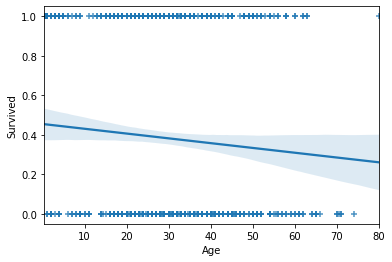

In [53]:
sns.regplot(x='Age',y='Survived',marker="+",data=TitdataDf)

If p >= 0.5, then the passenger had survived.
If p < 0.5, then the passenger had not survived.

### Using a confusion matrix to validate our model

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

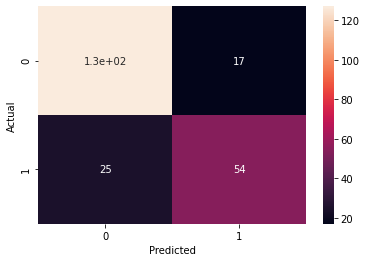

In [54]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True)

#### Interpreting the results of the confusion matrix

   So here we can clearly from the confusion matrix that our model did a preaty good prediction let's explain why :
To satat with we have here the result we got from the test set wich represent 25% of the initaial dataframe ( wich mean that we did test our model on 226 passenger ).
  The model prdicted:
- 130 passenger died (from the case [0,0]) and it was a correct prediction.
- 17 passenger died (from the case [0,1]) and it was a wrong prediction.
- 25 passenger survived (from the case [1,0]) and it was a wrong pridiction.
- 54 passenger survived (from the case [1,1]) and it was a correct prediction.
To resume 184 pessenger were correctly predicted (wich represent 81,42% of the test set) and 42 were not (18,58% of the test set).

So we can clearly say that our model gives a percentage of nearly 80% correct prediction wich is very well.

## ROC / AUC validation matrix

   The Receiver Operator Characteristic (ROC) curve is an evaluation metric for binary classification problems.
It is a probability curve that plots the TPR(True Positive Rate) against FPR(False Positive Rate) at various threshold values.

   The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve.
   
   The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes.
   
- When AUC = 1, then the classifier is able to perfectly distinguish between all the Positive and the Negative class points correctly. If, however, the AUC had been 0, then the classifier would be predicting all Negatives as Positives, and all Positives as Negatives.
- When 0.5<AUC<1, there is a high chance that the classifier will be able to distinguish the positive class values from the negative class values. This is so because the classifier is able to detect more numbers of True positives and True negatives than False negatives and False positives.
- When AUC=0.5, then the classifier is not able to distinguish between Positive and Negative class points. Meaning either the classifier is predicting random class or constant class for all the data points.

In [68]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# roc curve for model
pred_prob = logreg.predict_proba(x_test)
fpr, tpr, thresh = roc_curve(y_test, pred_prob[:,1], pos_label=1)

auc_score = roc_auc_score(y_test, pred_prob[:,1])

# roc curve for tpr = fpr
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

In [66]:
print("The AUC is equale to : ",auc_score)

The AUC is equale to :  0.8404975386779183


From this result we can see that is pretty similat to the one from the confusion matrix but in this case it's more more precise.

### Ploting the ROC curves

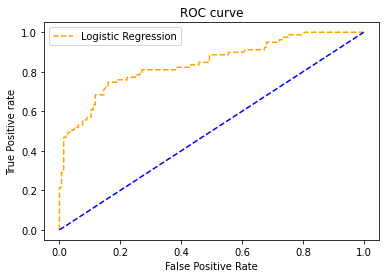

In [67]:
plt.plot(fpr, tpr, linestyle='--',color='orange', label='Logistic Regression')
plt.title('ROC curve')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show()